In [1]:
import numpy as np
from matplotlib import rc
import matplotlib
import matplotlib.pyplot as plt
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
%matplotlib inline

cmap = 'inferno'

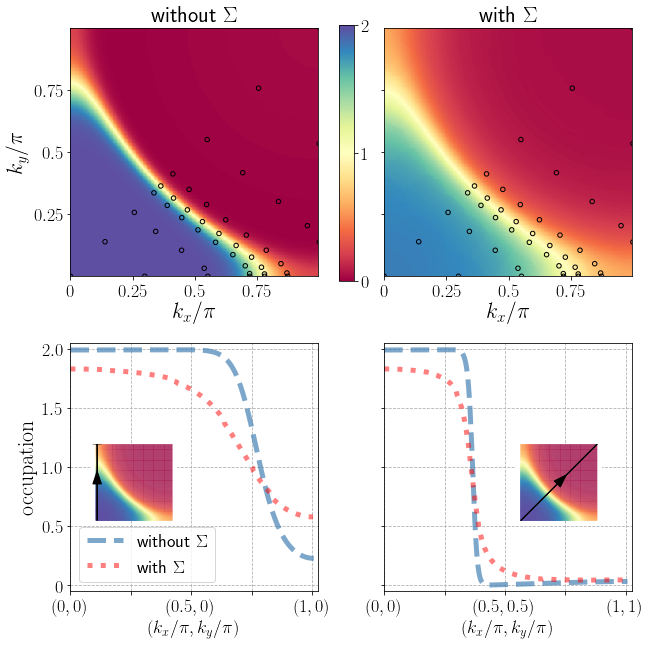

In [31]:
# Color plot of the occupation
fs = 18
def myaspect(ax,r = 1.):
    ax.set_aspect(r*(ax.get_xlim()[1]-ax.get_xlim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]) )
def addFermi (namefile, ax,  title, xtw =True , ytw =True, bar = False , left = True ): 
    
    cmap = 'Spectral'
    # This part is usually not needed: only if you want to fix the intensity of the colormap
    smap = plt.cm.Spectral
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0.1, 0.8, smap.N)
    my_cmap = ListedColormap(my_cmap)
    cmap = plt.cm.Spectral
    #ax = plt.subplot(location)
    matriciona = np.loadtxt(namefile, comments ='#')
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/(matriciona.shape[0])),
                        np.arange(0.,np.pi,np.pi/(matriciona.shape[0])), matriciona,cmap=cmap, vmin = 0., vmax =2.)
    ax.set_title(title,fontsize=fs+4)
    divider = make_axes_locatable(ax)
    if bar: 
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        #plt.colorbar(im, ax=ax, shrink=0.52)
    ax.set_aspect(1) 
    ax.set_xlim(0,np.pi-np.pi/matriciona.shape[0])
    ax.set_ylim(0,np.pi)
    ax.set_xticks(np.arange(0.,np.pi,np.pi/4))
    ax.set_yticks(np.arange(np.pi/4,np.pi,np.pi/4))
    ax.set_xlabel(r'$k_x/\pi$',fontsize = fs+4)
    if left:
        ax.set_ylabel(r'$k_y/\pi$',fontsize = fs+4)    
        ax.set_yticklabels([r'$0.25$',r'$0.5$', r'$0.75$'],fontsize = fs )
    else: 
        ax.set_yticklabels([])
    if xtw : 
        ax.set_xticklabels([r'$0$',r'$0.25$',r'$0.5$', r'$0.75$'],fontsize =fs)
        
    return im, divider

# Color plot of the occupation for the inset: The colors are lighter    
def subFermi (namefile, ax,  title=None, xtw =True , ytw =True, bar = False   ):    
 # Choose colormap
    smap = plt.cm.Spectral
    # Get the colormap colors
    my_cmap = smap(np.arange(smap.N))
    my_cmap[:,-1] = np.linspace(0.05, 0.2, smap.N)
    my_cmap = ListedColormap(my_cmap)
    
    matriciona = np.loadtxt(namefile, comments ='#')
   
    #[i.set_linestyle('dashed') for i in ax.spines.itervalues()]
    [i.set_visible(False) for i in ax.spines.itervalues()]
    [i.set_linewidth(0.3) for i in ax.spines.itervalues()]

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    im= ax.pcolormesh ( np.arange(0.,np.pi,np.pi/matriciona.shape[0]),np.arange(0.,np.pi,np.pi/matriciona.shape[0]),matriciona,cmap=my_cmap)     
    ax.set_aspect(1) 
    ax.set_xlim([-0.2,np.pi+0.2])

    
#Plot of the cuts 
def subCutFermi(ax2,ax1):

    #fig = plt.gcf()
    #ax2 = plt.axes([0.,0.,figsize[0]*0.5,figsize[1]*0.5])
    #ax1 = plt.axes([figsize[0]*0.5,0.,figsize[0]*0.5,figsize[1]*0.5])
    mar  = 'o'
    mar2 = 's'
    ms = 7.0

    matricionaN = np.loadtxt('../data/Fermi_occupation_NOSE_fill0_600.txt', comments ='#')
    matricionaS = np.loadtxt('../data/Fermi_occupation_SE_fill0_600.txt', comments='#')
    ax1.set_xticks(np.arange(0,matricionaN.shape[0],matricionaN.shape[0]/4))
    ax1.set_xticklabels([r'$(0,0)$','',r'$(0.5,0.5)$','',r'$(1,1)$'],fontsize = fs)
    ax1.set_yticklabels([])
    #plot lungo uno degli assi
   # ax1.plot([matricionaN[i,i] for  i in range(matricionaN.shape[0])],linestyle='none',
   #          marker = mar2,markeredgecolor='black', markersize=ms, c ='steelblue',alpha = 0.7)
   # ax1.plot([matricionaS[i,i] for  i in range(matricionaS.shape[0])],linestyle='none',
   #          marker = mar,markeredgecolor='black', markersize=ms,  c ='red',alpha =0.5)
    ax1.plot([matricionaN[i,i] for  i in range(matricionaN.shape[0])],linestyle='dashed',linewidth=5.0,
              c ='steelblue',alpha = 0.7)
    ax1.plot([matricionaS[i,i] for  i in range(matricionaS.shape[0])],linestyle='dotted',linewidth=5.0,
              c ='red',alpha =0.5)
    ax1.set_xlim([0,matricionaN.shape[0]+5])
    ax1.set_ylim([-0.05,2.05])
    ax1.grid(linestyle='dashed')


    ax1.set_yticks(np.arange(0.,2.1,0.5))
    ax1.set_yticklabels([r'$0$', r'$0.5$', r'$1.0$',r'$1.5$',r'$2.0$'],fontsize =fs)
    ax1.set_yticklabels([])

    #ax1.set_aspect('equal')
   
    ax2.set_xlim([0,matricionaN.shape[0]+5])
    #ax2.plot([matricionaN[i,0] for  i in range(matricionaN.shape[0])],linestyle='dashed',
    #         marker = mar2, markeredgecolor='black', markersize=ms, c ='steelblue',alpha=0.7,label=r'without $\Sigma$')
    #ax2.plot([matricionaS[i,0] for  i in range(matricionaS.shape[0])], linestyle='dotted',
    #         marker = mar,markeredgecolor='black', markersize=ms, c ='red',alpha=0.5,label=r'with $\Sigma$')
    ax2.plot([matricionaN[i,0] for  i in range(matricionaN.shape[0])],linestyle='dashed',linewidth=5.0,
              c ='steelblue',alpha=0.7,label=r'without $\Sigma$')
    ax2.plot([matricionaS[i,0] for  i in range(matricionaS.shape[0])], linestyle='dotted',linewidth=5.0,
              c ='red',alpha=0.5,label=r'with $\Sigma$')
    ax2.set_xticks(np.arange(0,matricionaN.shape[0],matricionaN.shape[0]/4))
    ax2.set_xticklabels([r'$(0,0)$','',r'$(0.5,0)$','',r'$(1,0)$'],fontsize = fs)
   
    ax2.set_ylim([-0.05,2.05])
    ax2.grid(linestyle='dashed')
    ax2.legend(fontsize = fs)
    #ax1.set_aspect(1.0)
    #ax2.set_ylabel(r'$\mathrm{occupation}$',fontsize=fs+8)

    ax2.set_yticks(np.arange(0.,2.1,0.5))
    ax2.set_yticklabels([r'$0$', r'$0.5$', r'$1.0$',r'$1.5$',r'$2.0$'],fontsize =fs)
    ax1.set_xlabel(r'$(k_x/\pi,k_y/\pi)$',fontsize = fs)
    ax2.set_xlabel(r'$(k_x/\pi,k_y/\pi)$',fontsize = fs)
    ax2.set_ylabel(r'$\mathrm{occupation}$', fontsize =fs+4)
    myaspect(ax2)
    myaspect(ax1)

def plotpatch(filename,ax): 
    kx, ky = np.loadtxt(filename,usecols=(0,1),unpack=True)
    ax.scatter(kx,ky,s=20.0,edgecolor='black',marker='o',facecolor='none')
# Fermi plots
fig = plt.figure()
#gs_left =  plt.GridSpec(1, 2, width_ratios=[1,0.5])
#gs_right = plt.GridSpec(1, 2, width_ratios=[1,0.5])
#ax1 = plt.subplot(gs[0])
#ax2 = plt.subplot(gs[1])
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
#ax3 = plt.axes([0.0, -0.3, alt, lar])
#ax4 = plt.axes([0.6, -0.3, alt, lar])
sz = 0.55
#ax1 = plt.axes([0.15,0.,sz,sz])
#ax2 = plt.axes([0.7,0.,sz,sz])

#addFermi===> plot dell'occupation
im=addFermi('../data/Fermi_occupation_NOSE_fill0_600.txt',ax1,r'without $\Sigma$')[0]
addFermi('../data/Fermi_occupation_SE_fill0_600.txt',ax2,r'with $\Sigma$', left= False)
plotpatch('../data/k_grid_tpri_-0.08_occ_0.6.dat',ax1)
plotpatch('../data/k_grid_tpri_-0.08_occ_0.6.dat',ax2)
# Plot del taglio a' la Salmhofer 
subCutFermi(ax3,ax4) 
#Block1 of FS
ax1 = plt.axes([0.20, 0.23, .12, .12])
subFermi('../data/Fermi_occupation_SE_fill0_600.txt',ax1)
ax1.arrow(0.05, 0.00, 0.0, 1.50, head_width=0.35, color='black')
ax1.arrow(0.05, 1.5, 0.0, 1.64, head_width=0.35)
# Block2 of FS
ax2 = plt.axes([0.79, 0.23, .12, .12])
subFermi('../data/Fermi_occupation_SE_fill0_600.txt',ax2)
ax2.arrow(0., 0., 1.5, 1.5, head_width=0.35, color='black')
ax2.arrow(1.5,1.5, 1.64, 1.64, head_width=0.0)
#Put the colorbar 
axbar = fig.add_axes([0.545,0.570,0.02,0.355])
cbar = fig.colorbar(im,cax=axbar, ticks=[0, 1.0, 2], orientation='vertical')
cbar.ax.set_yticklabels([r'$0$', r'$1$', r'$2$'],fontsize = fs)# horizontal colorbar
#plt.suptitle("Occupation",fontsize=22)
plt.subplots_adjust(hspace=-1.45,wspace = -1.0)
plt.tight_layout()
plt.gcf().set_size_inches(10.0,10.0)
plt.savefig('/home/taranto/Documents/fRG_paper/images/occupations_0600.png',dpi=300)
